### Individual ACS Data

[Documentation](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2015-2019.pdf)

###### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from data_pipeline import fetch_census_data

In [3]:
#fetch_census_data.acs5_individual(force_api_call=True)

###### Importing Data

In [4]:
# loading individual acs data

acs_ind=pd.read_csv("data/acs5_individual.csv").drop(
                        ['state'], axis=1)
acs_ind.head(5)

,Unnamed: 0,internet_access,internet_access_af,broadband,broadband_af,family_income,family_income_af,hh_income,hh_income_af,poverty,race,race_af,hispanic,hispanic_af,pop_sixty,weight,public use microdata area
0,0,1,0,1,0,-60000,0,1000,1,8,1,0,1,0,0,47,3520
1,1,1,0,1,0,-60000,0,96000,0,501,2,0,1,0,0,29,3501
2,2,1,0,1,0,366000,0,366000,0,501,1,0,1,0,0,15,3420
3,3,1,0,1,0,366000,0,366000,0,501,6,0,1,0,0,13,3420
4,4,1,0,1,0,366000,0,366000,0,501,9,0,1,0,0,14,3420


##### Recoding Variables

Internet Access

In [5]:
acs_ind.internet_access.unique()

array([1, 3, 0, 2])

In [6]:
# need to remove the responses with "0" because it means no response

acs_ind = acs_ind[acs_ind['internet_access'] >0]

In [7]:
# recoding internet access
# 0 = no access
# 1 = access 

acs_ind.loc[(acs_ind.internet_access == 2),'internet_access']=1
acs_ind.loc[(acs_ind.internet_access == 3),'internet_access']=0

Hispanic

In [8]:
# recoding hispanic
# 0 = not hispanic
# 1 = hispanic

acs_ind.loc[(acs_ind.hispanic == 1),'hispanic']=0
acs_ind.loc[(acs_ind.hispanic > 1),'hispanic']=1

In [9]:
acs_ind.hispanic.unique()

array([0, 1])

non-Hispanic White, Black, Asian Races

In [10]:
black_df = acs_ind[["Unnamed: 0","race","hispanic"]].rename(columns={
                        "race": "black"})

In [11]:
black_df.loc[(black_df.black < 2),'black']=0
black_df.loc[(black_df.black > 2),'black']=0
black_df.loc[(black_df.black == 2),'black']=1

In [12]:
black_df.black.unique()

array([0, 1])

In [13]:
black_df["nh_black"]=black_df['hispanic']+black_df['black']

In [14]:
black_df.loc[(black_df.nh_black == 0),'nh_black']=0
black_df.loc[(black_df.nh_black == 1),'nh_black']=1
black_df.loc[(black_df.nh_black == 2),'nh_black']=0

In [15]:
black_df.nh_black.unique()

array([0, 1])

In [16]:
black_df=black_df.drop(['hispanic'], axis=1)

In [17]:
white_df = acs_ind[["Unnamed: 0","race", "hispanic"]].rename(columns={
                        "race": "white"})

In [18]:
white_df.loc[(white_df.white < 1),'white']=0
white_df.loc[(white_df.white > 1),'white']=0
white_df.loc[(white_df.white == 1),'white']=1

In [19]:
white_df.white.unique()

array([1, 0])

In [20]:
white_df["nh_white"]=white_df['hispanic']+white_df['white']

In [21]:
white_df.loc[(white_df.nh_white == 0),'nh_white']=0
white_df.loc[(white_df.nh_white == 1),'nh_white']=1
white_df.loc[(white_df.nh_white == 2),'nh_white']=0

In [22]:
white_df=white_df.drop(['hispanic'], axis=1)

In [23]:
asian_df = acs_ind[["Unnamed: 0","race", "hispanic"]].rename(columns={
                        "race": "asian"})

In [24]:
asian_df.loc[(asian_df.asian < 6),'asian']=0
asian_df.loc[(asian_df.asian > 6),'asian']=0
asian_df.loc[(asian_df.asian == 6),'asian']=1

In [25]:
asian_df.asian.unique()

array([0, 1])

In [26]:
asian_df["nh_asian"]=asian_df['hispanic']+asian_df['asian']

In [27]:
asian_df.loc[(asian_df.nh_asian == 0),'nh_asian']=0
asian_df.loc[(asian_df.nh_asian == 1),'nh_asian']=1
asian_df.loc[(asian_df.nh_asian == 2),'nh_asian']=0

In [28]:
asian_df=asian_df.drop(['hispanic'], axis=1)

In [29]:
acs_ind=acs_ind.merge(white_df, on='Unnamed: 0'
                           ).merge(black_df, on='Unnamed: 0').merge(asian_df, on='Unnamed: 0')

Household & Family Income

In [30]:
acs_ind.family_income.unique()

array([ -60000,  366000,  385000, ...,  211900, 1033000,  315300])

In [31]:
acs_ind.family_income.min()

-60000

In [32]:
acs_ind.hh_income.unique()

array([   1000,   96000,  366000, ..., 1033000,  315300,   68380])

In [33]:
acs_ind.hh_income.min()

-9500

In [34]:
# keeping incomes above 0 

acs_ind = acs_ind[acs_ind['hh_income'] >0]
acs_ind = acs_ind[acs_ind['family_income'] >0]

In [35]:
# log incomes

acs_ind["log_family_income"]=acs_ind["family_income"].apply(lambda x: np.log(x))
acs_ind["log_hh_income"]=acs_ind["hh_income"].apply(lambda x: np.log(x))

In [36]:
acs_ind.log_family_income.unique()

array([12.81038861, 12.86099861, 11.17759258, ..., 12.26386974,
       13.84797775, 12.66127985])

In [37]:
acs_ind.log_family_income.min()

0.0

In [38]:
acs_ind.log_hh_income.unique()

array([12.81038861, 12.86099861, 11.17759258, ..., 12.26386974,
       13.84797775, 12.66127985])

In [39]:
acs_ind.log_hh_income.min()

0.0

In [40]:
acs_ind.head(10)

,Unnamed: 0,internet_access,internet_access_af,broadband,broadband_af,family_income,family_income_af,hh_income,hh_income_af,poverty,...,weight,public use microdata area,white,nh_white,black,nh_black,asian,nh_asian,log_family_income,log_hh_income
2,2,1,0,1,0,366000,0,366000,0,501,...,15,3420,1,1,0,0,0,0,12.810389,12.810389
3,3,1,0,1,0,366000,0,366000,0,501,...,13,3420,0,0,0,0,1,1,12.810389,12.810389
4,4,1,0,1,0,366000,0,366000,0,501,...,14,3420,0,0,0,0,0,0,12.810389,12.810389
5,5,1,0,1,0,366000,0,366000,0,501,...,12,3420,0,0,0,0,0,0,12.810389,12.810389
6,6,1,0,1,0,385000,0,385000,0,501,...,16,3502,1,1,0,0,0,0,12.860999,12.860999
7,7,1,0,1,0,385000,0,385000,0,501,...,16,3502,1,1,0,0,0,0,12.860999,12.860999
8,8,1,0,1,0,385000,0,385000,0,501,...,17,3502,1,1,0,0,0,0,12.860999,12.860999
10,10,1,0,1,0,71510,0,71510,0,288,...,15,3422,1,1,0,0,0,0,11.177593,11.177593
11,11,1,0,1,0,71510,0,71510,0,288,...,15,3422,1,1,0,0,0,0,11.177593,11.177593
12,12,1,0,1,0,71510,0,71510,0,288,...,22,3422,1,1,0,0,0,0,11.177593,11.177593


#### Visualizations

<AxesSubplot:xlabel='internet_access', ylabel='log_hh_income'>

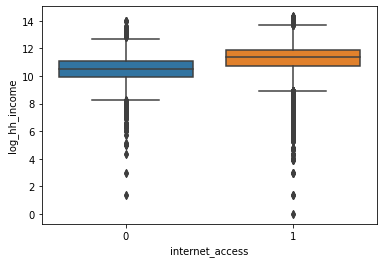

In [41]:
sns.boxplot(x="internet_access", y="log_hh_income", data=acs_ind)

<AxesSubplot:xlabel='internet_access', ylabel='log_family_income'>

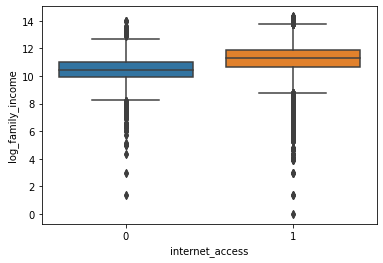

In [42]:
sns.boxplot(x="internet_access", y="log_family_income", data=acs_ind)

In [43]:
count_no_int = len(acs_ind[acs_ind['internet_access']==0])
count_int = len(acs_ind[acs_ind['internet_access']==1])
pct_of_int = count_int/(count_no_int+count_int)
print("percentage with internet access is", pct_of_int*100)
pct_of_no_int = count_no_int/(count_no_int+count_int)
print("percentage with no internet access", pct_of_no_int*100)

percentage with internet access is 91.8771715654052
percentage with no internet access 8.122828434594798


### List of variables that may impact internet access

- household income
- family income
- race
- hispanic
- poverty to income ratio 

### Correlation 

<AxesSubplot:>

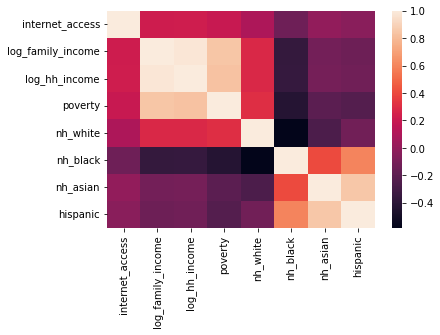

In [44]:
sns.heatmap(
    acs_ind[['internet_access','log_family_income','log_hh_income','poverty','nh_white','nh_black','nh_asian','hispanic']]
    .corr()
)

#### Logistic Regression

In [45]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit

#### Full Model with All Variables

In [46]:
formula=("internet_access ~ log_hh_income + hispanic + nh_white + nh_black")

model=logit(formula=formula, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.257311
         Iterations 7


In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                85192
Model:                          Logit   Df Residuals:                    85187
Method:                           MLE   Df Model:                            4
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                 0.08677
Time:                        14:54:01   Log-Likelihood:                -21921.
converged:                       True   LL-Null:                       -24004.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.3054      0.135    -24.525      0.000      -3.570      -3.041
log_hh_income     0.5680      0.012     48.282      0.000       0.545       0.591
hispanic          0.2207      0.033      6.605      0.000       0.155       0.286
nh_white         -0.0345      0.036     -0.968      0.333      -0.104       0.035
nh_black         -0.8120      0.043    -18.708      0.000      -0.897      -0.727
=================================================================================
"""

We took out one of the race variables (Asian) because (together, all four race variales are perfectly multicollinear) and that we should probably drop log_family_income and poverty because they’re highly correlated with log_hh_income and would complicate the interpretation and reduce precision without explaining much more of the variation.

#### Income Models

In [58]:
formulaA=("internet_access ~ log_hh_income")

modelA=logit(formula=formulaA, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.260726
         Iterations 7


In [59]:
modelA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                85192
Model:                          Logit   Df Residuals:                    85190
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                 0.07465
Time:                        14:55:47   Log-Likelihood:                -22212.
converged:                       True   LL-Null:                       -24004.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.6931      0.119    -39.354      0.000      -4.927      -4.459
log_hh_income     0.6524      0.011     58.603      0.000       0.631       0.674
=================================================================================
"""

In [60]:
formulaB=("internet_access ~ log_family_income")

modelB=logit(formula=formulaB, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.261588
         Iterations 7


In [61]:
modelB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                85192
Model:                          Logit   Df Residuals:                    85190
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                 0.07159
Time:                        14:56:08   Log-Likelihood:                -22285.
converged:                       True   LL-Null:                       -24004.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -4.3837      0.116    -37.777      0.000      -4.611      -4.156
log_family_income     0.6265      0.011     57.608      0.000       0.605       0.648
=====================================================================================
"""

In [62]:
formulaC=("internet_access ~ poverty")

modelC=logit(formula=formulaC, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.263059
         Iterations 7


In [63]:
modelC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                85192
Model:                          Logit   Df Residuals:                    85190
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                 0.06637
Time:                        14:56:31   Log-Likelihood:                -22411.
converged:                       True   LL-Null:                       -24004.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2529      0.022     56.753      0.000       1.210       1.296
poverty        0.0043   8.08e-05     53.523      0.000       0.004       0.004
==============================================================================
"""

#### Race & Ethnicity Models 

In [48]:
formula0=("internet_access ~ hispanic")

model0=logit(formula=formula0, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.281224
         Iterations 6


In [56]:
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                85192
Model:                          Logit   Df Residuals:                    85190
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                0.001899
Time:                        14:54:09   Log-Likelihood:                -23958.
converged:                       True   LL-Null:                       -24004.
Covariance Type:            nonrobust   LLR p-value:                 1.333e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5084      0.016    161.395      0.000       2.478       2.539
hispanic      -0.2543      0.026     -9.654      0.000      -0.306      -0.203
==============================================================================
"""

In [50]:
formula1=("internet_access ~ nh_white")

model1=logit(formula=formula1, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.277183
         Iterations 7


In [51]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                85192
Model:                          Logit   Df Residuals:                    85190
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                 0.01624
Time:                        14:54:01   Log-Likelihood:                -23614.
converged:                       True   LL-Null:                       -24004.
Covariance Type:            nonrobust   LLR p-value:                1.382e-171
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1275      0.016    137.091      0.000       2.097       2.158
nh_white       0.7218      0.027     27.161      0.000       0.670       0.774
==============================================================================
"""

In [52]:
formula2=("internet_access ~ nh_black")

model2=logit(formula=formula2, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.272398
         Iterations 7


In [53]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                85192
Model:                          Logit   Df Residuals:                    85190
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:                 0.03323
Time:                        14:54:02   Log-Likelihood:                -23206.
converged:                       True   LL-Null:                       -24004.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1180      0.025    125.324      0.000       3.069       3.167
nh_black      -1.0806      0.029    -37.394      0.000      -1.137      -1.024
==============================================================================
"""

In [54]:
formula3=("internet_access ~ nh_asian")

model3=logit(formula=formula3, data=acs_ind).fit()

Optimization terminated successfully.
         Current function value: 0.281739
         Iterations 6


In [55]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        internet_access   No. Observations:                85192
Model:                          Logit   Df Residuals:                    85190
Method:                           MLE   Df Model:                            1
Date:                Sun, 06 Mar 2022   Pseudo R-squ.:               6.965e-05
Time:                        14:54:02   Log-Likelihood:                -24002.
converged:                       True   LL-Null:                       -24004.
Covariance Type:            nonrobust   LLR p-value:                   0.06747
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4436      0.016    153.148      0.000       2.412       2.475
nh_asian      -0.0473      0.026     -1.831      0.067      -0.098       0.003
==============================================================================
"""